In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
%matplotlib inline
sns.set(color_codes=True)
sns.set(style="whitegrid")

In [2]:
# Load the data
data = pd.read_excel("Online Retail.xlsx")
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
# Remove duplicates
data.drop_duplicates(inplace=True)

In [4]:
# Dropping columns with information that seems to be not useful. CustomerID could be used as a unique identifier, but we are skipping it.
data = data.drop(['InvoiceNo', 'StockCode', 'CustomerID'], axis=1)
data.head()

,Description,Quantity,InvoiceDate,UnitPrice,Country
0,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,United Kingdom
1,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,United Kingdom
2,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,United Kingdom
3,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,United Kingdom
4,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,United Kingdom


In [5]:
data.shape

(536641, 5)

In [6]:
data.count()

Description    535187
Quantity       536641
InvoiceDate    536641
UnitPrice      536641
Country        536641
dtype: int64

In [7]:
# Dropping rows with missing values
data.dropna(inplace=True)

In [8]:
data.count()

Description    535187
Quantity       535187
InvoiceDate    535187
UnitPrice      535187
Country        535187
dtype: int64

In [9]:
# Handling outliers using z-score
z_scores = np.abs(zscore(data[['Quantity', 'UnitPrice']]))
threshold = 3
cleaned_data = data[(z_scores < threshold).all(axis=1)]

In [10]:
# Basic statistics
print(cleaned_data.describe())

            Quantity                    InvoiceDate      UnitPrice
count  534500.000000                         534500  534500.000000
mean        9.386840  2011-07-04 11:52:11.843405056       3.542766
min      -635.000000            2010-12-01 08:26:00       0.000000
25%         1.000000            2011-03-28 11:34:00       1.250000
50%         3.000000            2011-07-19 15:55:00       2.080000
75%        10.000000            2011-10-19 08:20:00       4.130000
max       666.000000            2011-12-09 12:50:00     296.610000
std        26.167656                            NaN       7.549062


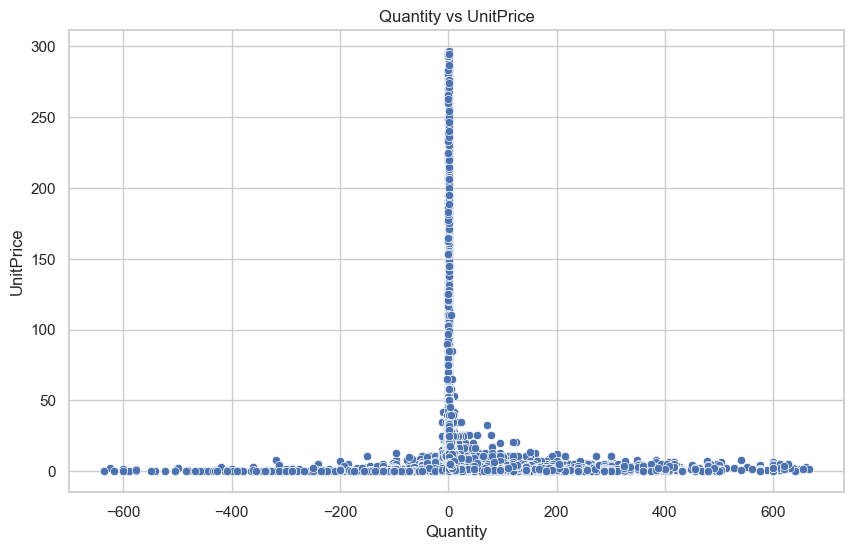

In [11]:
# A scatter plot of Quantity vs UnitPrice
plt.figure(figsize=(10, 6))
sns.scatterplot(data=cleaned_data, x='Quantity', y='UnitPrice')
plt.title('Quantity vs UnitPrice')
plt.show()

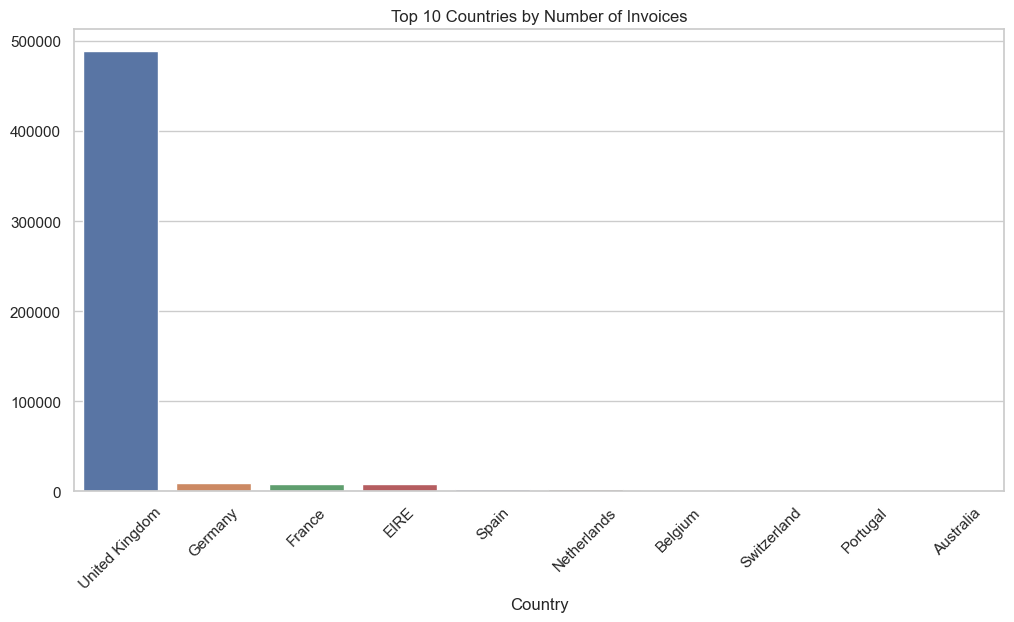

In [12]:
# A bar plot of the top 10 countries by number of invoices
top_countries = cleaned_data['Country'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_countries.index, y=top_countries.values)
plt.xticks(rotation=45)
plt.title('Top 10 Countries by Number of Invoices')
plt.show()

C:\Users\SKB\AppData\Local\Temp\ipykernel_30092\1350960742.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['InvoiceDate'] = pd.to_datetime(cleaned_data['InvoiceDate'])


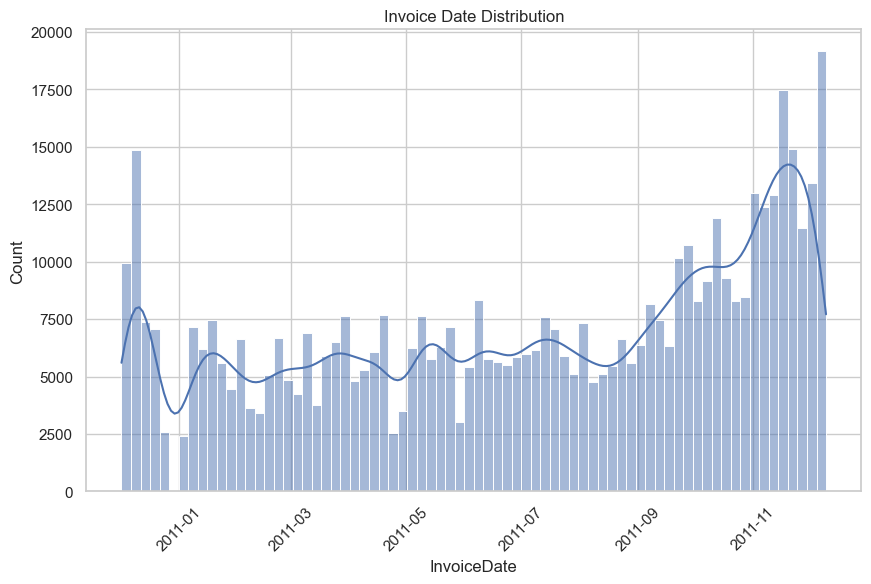

In [13]:
# Create a histogram of InvoiceDate
cleaned_data['InvoiceDate'] = pd.to_datetime(cleaned_data['InvoiceDate'])
plt.figure(figsize=(10, 6))
sns.histplot(data=cleaned_data, x='InvoiceDate', kde=True)
plt.title('Invoice Date Distribution')
plt.xticks(rotation=45)
plt.show()